<a href="https://colab.research.google.com/github/sizur02/practicasencolab/blob/main/practicaenclase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loss en test: 1.6776
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


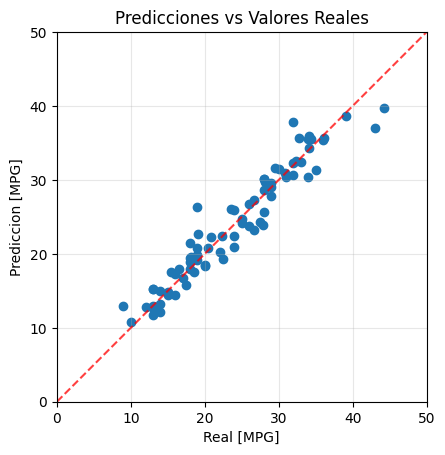

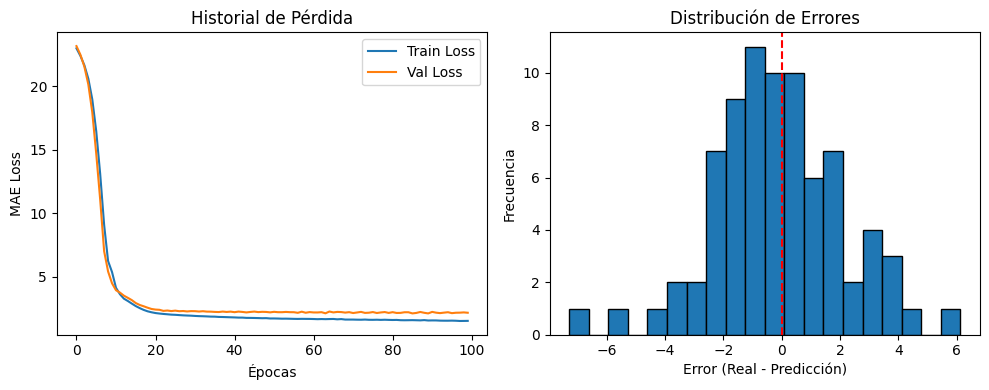


Métricas de evaluación:
MAE: 1.6776
MSE: 4.9441
RMSE: 2.2235
R²: 0.9243


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#red neuronal secuencial
from tensorflow.keras.models import Sequential
#capa completamente conectada
from tensorflow.keras.layers import Dense, Normalization
#Optimizador
from tensorflow.keras.optimizers import Adam

#Asegurar que los resultados sean "reproducibles"
import tensorflow as tf
tf.random.set_seed(1234)

# Cargar datos
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

# Convertir a numpy arrays para Keras
x_train_np = X_train.values
x_test_np = X_test.values
y_train_np = y_train.values.flatten()
y_test_np = y_test.values.flatten()

def crear_normalizador(datos):
    normalizer = Normalization(axis=-1)
    normalizer.adapt(np.array(datos))
    return normalizer

normalizador = crear_normalizador(x_train_np)

def crear_nn_regresion(norm):
    model = Sequential([
        norm,
        Dense(32, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                  optimizer=Adam(0.001))
    return model

nn = crear_nn_regresion(normalizador)

history = nn.fit(
    x_train_np,
    y_train_np,
    validation_split=0.2,  # Corregido: validation_data -> validation_split
    verbose=0,
    epochs=100
)

# Evaluar el modelo
loss = nn.evaluate(x_test_np, y_test_np, verbose=0)
print(f"Loss en test: {loss:.4f}")

# Creación de predicciones
y_pred = nn.predict(x_test_np).flatten()

# Gráfico de comparación
a = plt.axes(aspect='equal')
plt.scatter(y_test_np, y_pred)
plt.xlabel('Real [MPG]')
plt.ylabel('Prediccion [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims, 'r--', alpha=0.75)
plt.grid(True, alpha=0.3)
plt.title('Predicciones vs Valores Reales')
plt.show()

# Gráfico de la pérdida durante el entrenamiento
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Épocas')
plt.ylabel('MAE Loss')
plt.legend()
plt.title('Historial de Pérdida')

# Histograma de errores
plt.subplot(1, 2, 2)
errores = y_test_np - y_pred
plt.hist(errores, bins=20, edgecolor='black')
plt.xlabel('Error (Real - Predicción)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Errores')
plt.axvline(x=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

# Métricas adicionales
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test_np, y_pred)
mse = mean_squared_error(y_test_np, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_np, y_pred)

print(f"\nMétricas de evaluación:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")